https://docs.opencv.org/master/d7/da8/tutorial_table_of_content_imgproc.html

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# basic drawing

In [5]:
W = 400
size = W,W,3
atom_image = np.zeros(size, dtype=np.uint8)
rook_image = np.zeros(size, dtype=np.uint8)

In [21]:
def my_polygon(img):
    line_type = 8
    # Create some points
    ppt = np.array([[W / 4, 7 * W / 8], [3 * W / 4, 7 * W / 8],
                    [3 * W / 4, 13 * W / 16], [11 * W / 16, 13 * W / 16],
                    [19 * W / 32, 3 * W / 8], [3 * W / 4, 3 * W / 8],
                    [3 * W / 4, W / 8], [26 * W / 40, W / 8],
                    [26 * W / 40, W / 4], [22 * W / 40, W / 4],
                    [22 * W / 40, W / 8], [18 * W / 40, W / 8],
                    [18 * W / 40, W / 4], [14 * W / 40, W / 4],
                    [14 * W / 40, W / 8], [W / 4, W / 8],
                    [W / 4, 3 * W / 8], [13 * W / 32, 3 * W / 8],
                    [5 * W / 16, 13 * W / 16], [W / 4, 13 * W / 16]], np.int32)
    ppt = ppt.reshape((-1, 1, 2))
    cv.fillPoly(img, [ppt], (255, 255, 255), line_type)
def my_filled_circle(img, center):
    thickness = -1
    line_type = 8
    cv.circle(img,
               center,
               W // 32,
               (0, 0, 255),
               thickness,
               line_type)
def my_ellipse(img, angle):
    thickness = 2
    line_type = 8
    cv.ellipse(img,
                (W // 2, W // 2),
                (W // 4, W // 16),
                angle,
                0,
                360,
                (0,255, 0),
                thickness,
                line_type)
def my_line(img, start, end):
    thickness = 2
    line_type = 8
    cv.line(img,
             start,
             end,
             (0, 0, 0),
             thickness,
             line_type)

In [22]:
# 1.a. Creating ellipses
my_ellipse(atom_image, 90)
my_ellipse(atom_image, 0)
my_ellipse(atom_image, 45)
my_ellipse(atom_image, -45)
# 1.b. Creating circles
my_filled_circle(atom_image, (W // 2, W // 2))
# 2. Draw a rook
# ------------------
# 2.a. Create a convex polygon
my_polygon(rook_image)
cv.rectangle(rook_image,
              (0, 7 * W // 8),
              (W, W),
              (0, 255, 255),
              -1,
              8)
#  2.c. Create a few lines
my_line(rook_image, (0, 15 * W // 16), (W, 15 * W // 16))
my_line(rook_image, (W // 4, 7 * W // 8), (W // 4, W))
my_line(rook_image, (W // 2, 7 * W // 8), (W // 2, W))
my_line(rook_image, (3 * W // 4, 7 * W // 8), (3 * W // 4, W))

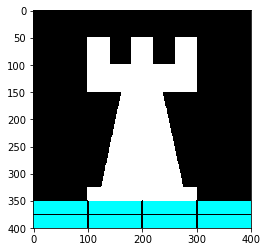

In [23]:
plt.imshow(rook_image)
plt.show()

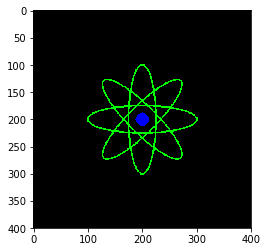

In [24]:
plt.imshow(atom_image)
plt.show()

## smoothing images - one of the application is to reduce noise
###neighborhood operation

In [26]:
#  Global Variables
DELAY_CAPTION = 1500
DELAY_BLUR = 100
MAX_KERNEL_LENGTH = 31

In [27]:
img = cv.imread('starry_night.jpg')

In [29]:
dst = np.zeros(img.shape, img.dtype)

In [41]:
#applyig homogeneous blur
dst = cv.blur(img, (3,3))

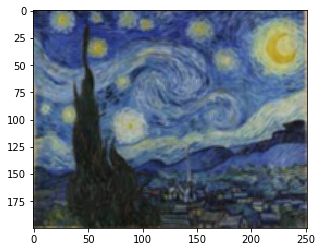

In [42]:
plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB))
plt.show()

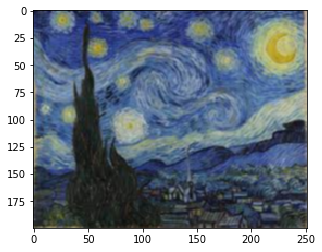

In [43]:
#Writing 0 implies that std-dev-x and std-dev-y is calculated using kernel size.
dst = cv.GaussianBlur(img, (3,3), 0)
plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB))
plt.show()

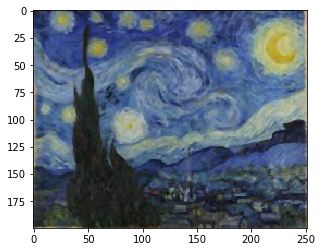

In [44]:
# only one parameter to specify the size of the filter as the filter must be square
dst = cv.medianBlur(img, 3)
plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB))
plt.show()

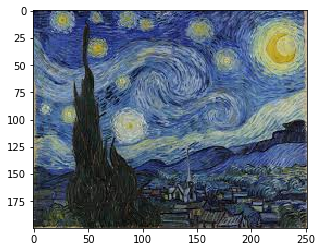

In [45]:
dst = cv.bilateralFilter(img, 3, 3 * 2, 3 / 2)
plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB))
plt.show()

### Morphological operators

In [1]:
#  A set of operations that process images based on shapes. 
# Morphological operations apply a structuring element to an input image and generate an output image.

In [4]:
# structure element type
cv.MORPH_RECT
cv.MORPH_CROSS
cv.MORPH_ELLIPSE

2

In [5]:
src = cv.imread('monalisa.jpg')

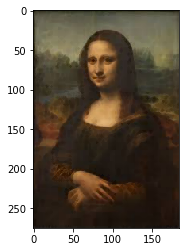

In [11]:
erosion_size = 1
erosion_type = cv.MORPH_ELLIPSE
element = cv.getStructuringElement(erosion_type, (2*erosion_size + 1, 2*erosion_size+1), (erosion_size, erosion_size))
erosion_dst = cv.erode(src, element)
plt.imshow(cv.cvtColor(erosion_dst, cv.COLOR_BGR2RGB))
plt.show()

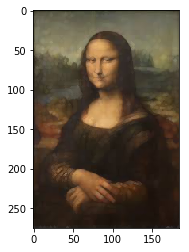

In [13]:
diltation_size = 1
dilation_type = cv.MORPH_ELLIPSE
element = cv.getStructuringElement(dilation_type, (2*diltation_size + 1, 2*diltation_size+1), (diltation_size, diltation_size))
dilation_dst = cv.dilate(src, element)
plt.imshow(cv.cvtColor(dilation_dst, cv.COLOR_BGR2RGB))
plt.show()

### opening - erosion followed by dilation
####Useful for removing small objects (it is assumed that the objects are bright on a dark foreground)
### closing - dilation followed by erosion
####Useful to remove small holes (dark regions)
### morphological gradient: dilation - erosion
### top hat: input image - opening
###black hat: closing - input image

In [ ]:
cv.MORPH_OPEN, cv.MORPH_CLOSE, cv.MORPH_GRADIENT, cv.MORPH_TOPHAT, cv.MORPH_BLACKHAT

In [5]:
src = cv.imread('monalisa.jpg')

In [16]:
morph_size = 2
morph_elem = cv.MORPH_RECT
#morph_elem = cv.MORPH_CROSS
#morph_elem = cv.MORPH_ELLIPSE
element = cv.getStructuringElement(morph_elem, (2*morph_size + 1, 2*morph_size+1), (morph_size, morph_size))
operation = cv.MORPH_GRADIENT
dst = cv.morphologyEx(src, operation, element)

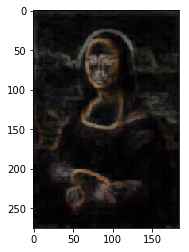

In [17]:
plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB))
plt.show()

#### how to find a given configuration or pattern in a binary image by using the Hit-or-Miss transform 
##(also known as Hit-and-Miss transform). 
##This transform is also the basis of more advanced morphological operations such as thinning or pruning.

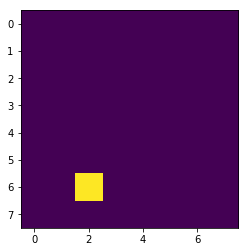

In [22]:
input_image = np.array((
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 255, 255, 255, 0, 0, 0, 255],
    [0, 255, 255, 255, 0, 0, 0, 0],
    [0, 255, 255, 255, 0, 255, 0, 0],
    [0, 0, 255, 0, 0, 0, 0, 0],
    [0, 0, 255, 0, 0, 255, 255, 0],
    [0,255, 0, 255, 0, 0, 255, 0],
    [0, 255, 255, 255, 0, 0, 0, 0]), dtype="uint8")
kernel = np.array((
        [0, 1, 0],
        [1, -1, 1],
        [0, 1, 0]), dtype="int")
output_image = cv.morphologyEx(input_image, cv.MORPH_HITMISS, kernel)
plt.imshow(output_image)
plt.show()